# Responsi 1 - Canonical Correlation Analysis

# Responsi 1 - Analisis Korelasi Kanonik

By : Muhammad Jauhar Hakim

## A. Import Library dan Data

In [2]:
packages <- c("MVN","CCP","Hmisc", "matlib", "Matrix","expm","matrixcalc","ellipsis","Hotelling","dplyr","psych","RcmdrMisc","Rcsdp","mvnormtest","factoextra","cluster","ggplot2","tree","class","CCA","vegan","candisc")
if ( length(missing_pkgs <- setdiff(packages, rownames(installed.packages()))) > 0) {
  message("Installing missing package(s): ", paste(missing_pkgs, collapse = ", "))
  install.packages(missing_pkgs)
}
lapply(packages, library, character.only = TRUE)

[[1]]
 [1] "candisc"     "heplots"     "broom"       "vegan"       "permute"    
 [6] "CCA"         "fields"      "viridis"     "viridisLite" "spam"       
[11] "fda"         "deSolve"     "fds"         "RCurl"       "rainbow"    
[16] "pcaPP"       "MASS"        "splines"     "class"       "tree"       
[21] "cluster"     "factoextra"  "mvnormtest"  "Rcsdp"       "RcmdrMisc"  
[26] "sandwich"    "car"         "carData"     "psych"       "dplyr"      
[31] "Hotelling"   "corpcor"     "ellipsis"    "matrixcalc"  "expm"       
[36] "Matrix"      "matlib"      "Hmisc"       "ggplot2"     "Formula"    
[41] "survival"    "lattice"     "CCP"         "MVN"         "stats"      
[46] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[51] "base"       

[[2]]
 [1] "candisc"     "heplots"     "broom"       "vegan"       "permute"    
 [6] "CCA"         "fields"      "viridis"     "viridisLite" "spam"       
[11] "fda"         "deSolve"     "fds"         "RCurl"       "rainbow"    
[16] "pcaPP"       "MASS"        "splines"     "class"       "tree"       
[21] "cluster"     "factoextra"  "mvnormtest"  "Rcsdp"       "RcmdrMisc"  
[26] "sandwich"    "car"         "carData"     "psych"       "dplyr"      
[31] "Hotelling"   "corpcor"     "ellipsis"    "matrixcalc"  "expm"       
[36] "Matrix"      "matlib"      "Hmisc"       "ggplot2"     "Formula"    
[41] "survival"    "lattice"     "CCP"         "MVN"         "stats"      
[46] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[51] "base"       

[[3]]
 [1] "candisc"     "heplots"     "broom"       "vegan"       "permute"    
 [6] "CCA"         "fields"      "viridis"     "viridisLite" "spam"       
[11] "fda"         "deSolve"     "fds"         "RCurl"       "rainbow"    
[16] "pcaPP"       "MASS"        "splines"     "class"       "tree"       
[21] "cluster"     "factoextra"  "mvnormtest"  "Rcsdp"       "RcmdrMisc"  
[26] "sandwich"    "car"         "carData"     "psych"       "dplyr"      
[31] "Hotelling"   "corpcor"     "ellipsis"    "matrixcalc"  "expm"       
[36] "Matrix"      "matlib"      "Hmisc"       "ggplot2"     "Formula"    
[41] "survival"    "lattice"     "CCP"         "MVN"         "stats"      
[46] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[51] "base"       

[[4]]
 [1] "candisc"     "heplots"     "broom"       "vegan"       "permute"    
 [6] "CCA"         "fields"      "viridis"     "viridisLite" "spam"       
[11] "fda"         "deSolve"     "fds"         "RCurl"       "rainbow"    
[16] "pcaPP"       "MASS"        "splines"     "class"       "tree"       
[21] "cluster"     "factoextra"  "mvnormtest"  "Rcsdp"       "RcmdrMisc"  
[26] "sandwich"    "car"         "carData"     "psych"       "dplyr"      
[31] "Hotelling"   "corpcor"     "ellipsis"    "matrixcalc"  "expm"       
[36] "Matrix"      "matlib"      "Hmisc"       "ggplot2"     "Formula"    
[41] "survival"    "lattice"     "CCP"         "MVN"         "stats"      
[46] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[51] "base"       

[[5]]
 [1] "candisc"     "heplots"     "broom"       "vegan"       "permute"    
 [6] "CCA"         "fields"      "viridis"     "viridisLite" "spam"       
[11] "fda"         "deSolve"     "fds"         "RCurl"       "rainbow"    
[16] "pcaPP"       "MASS"        "splines"     "class"       "tree"       
[21] "cluster"     "factoextra"  "mvnormtest"  "Rcsdp"       "RcmdrMisc"  
[26] "sandwich"    "car"         "carData"     "psych"       "dplyr"      
[31] "Hotelling"   "corpcor"     "ellipsis"    "matrixcalc"  "expm"       
[36] "Matrix"      "matlib"      "Hmisc"       "ggplot2"     "Formula"    
[41] "survival"    "lattice"     "CCP"         "MVN"         "stats"      
[46] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[51] "base"       

[[6]]
 [1] "candisc"     "heplots"     "broom"       "vegan"       "permute"    
 [6] "CCA"         "fields"      "virid

In [2]:
data <- read.csv("AirQualityUCI.csv", header=TRUE, sep=";")
dim(data)
head(data)

[1] 9357   15

,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,10/03/2004,23.00.00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


## B. Preprocessing Data

Untuk kelompok variabel set Y
1. T -> Temperature (Suhu)
2. RH -> Relative Humidity (Kelembapan Relatif)
3. AH -> Absolute Humidity (Kelembapan Mutlak)

Untuk kelompok variabel set X
1. CO.GT. (True hourly averaged concentration CO in mg/m^3 (reference analyzer))
2. PT08.S1.CO. ((tin oxide) hourly averaged sensor response (nominally CO targeted))
3. NMHC.GT. (True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer))
4. C6H6.GT. (True hourly averaged Benzene concentration in microg/m^3 (reference analyzer))
5. PT08.S2.NMHC. ((titania) hourly averaged sensor response (nominally NMHC targeted))
6. NOx.GT. (True hourly averaged NOx concentration in ppb (reference analyzer))
7. PT08.S3.NOx. ((tungsten oxide) hourly averaged sensor response (nominally NOx targeted))
8. NO2.GT. (True hourly averaged NO2 concentration in microg/m^3 (reference analyzer))
9. PT08.S4.NO2. ((tungsten oxide) hourly averaged sensor response (nominally NO2 targeted))
10. PT08.S5.O3. ((indium oxide) hourly averaged sensor response (nominally O3 targeted))

### 1. Mengeluarkan kolom Date dan Time

In [3]:
databaru=data[-1:-2]
databaru2=databaru[-14:-15]
datafinal = na.omit(databaru2)
dim(datafinal)
head(datafinal)

[1] 9357   13

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


### 2. Definisikan Kumpulan Variabel Dependen Dan Variabel Indenpenden

In [4]:
X <- datafinal[1:10]
Y <- datafinal[11:13]
head(X)
head(Y)

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268
2,2.0,1292,112,9.4,955,103,1174,92,1559,972
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110
6,1.2,1197,38,4.7,750,89,1337,96,1393,949


,T,RH,AH
,<dbl>,<dbl>,<dbl>
1,13.6,48.9,0.7578
2,13.3,47.7,0.7255
3,11.9,54.0,0.7502
4,11.0,60.0,0.7867
5,11.2,59.6,0.7888
6,11.2,59.2,0.7848


## C. Visualisasi
Visualize the correlation within each set between each pair then for both sets at once

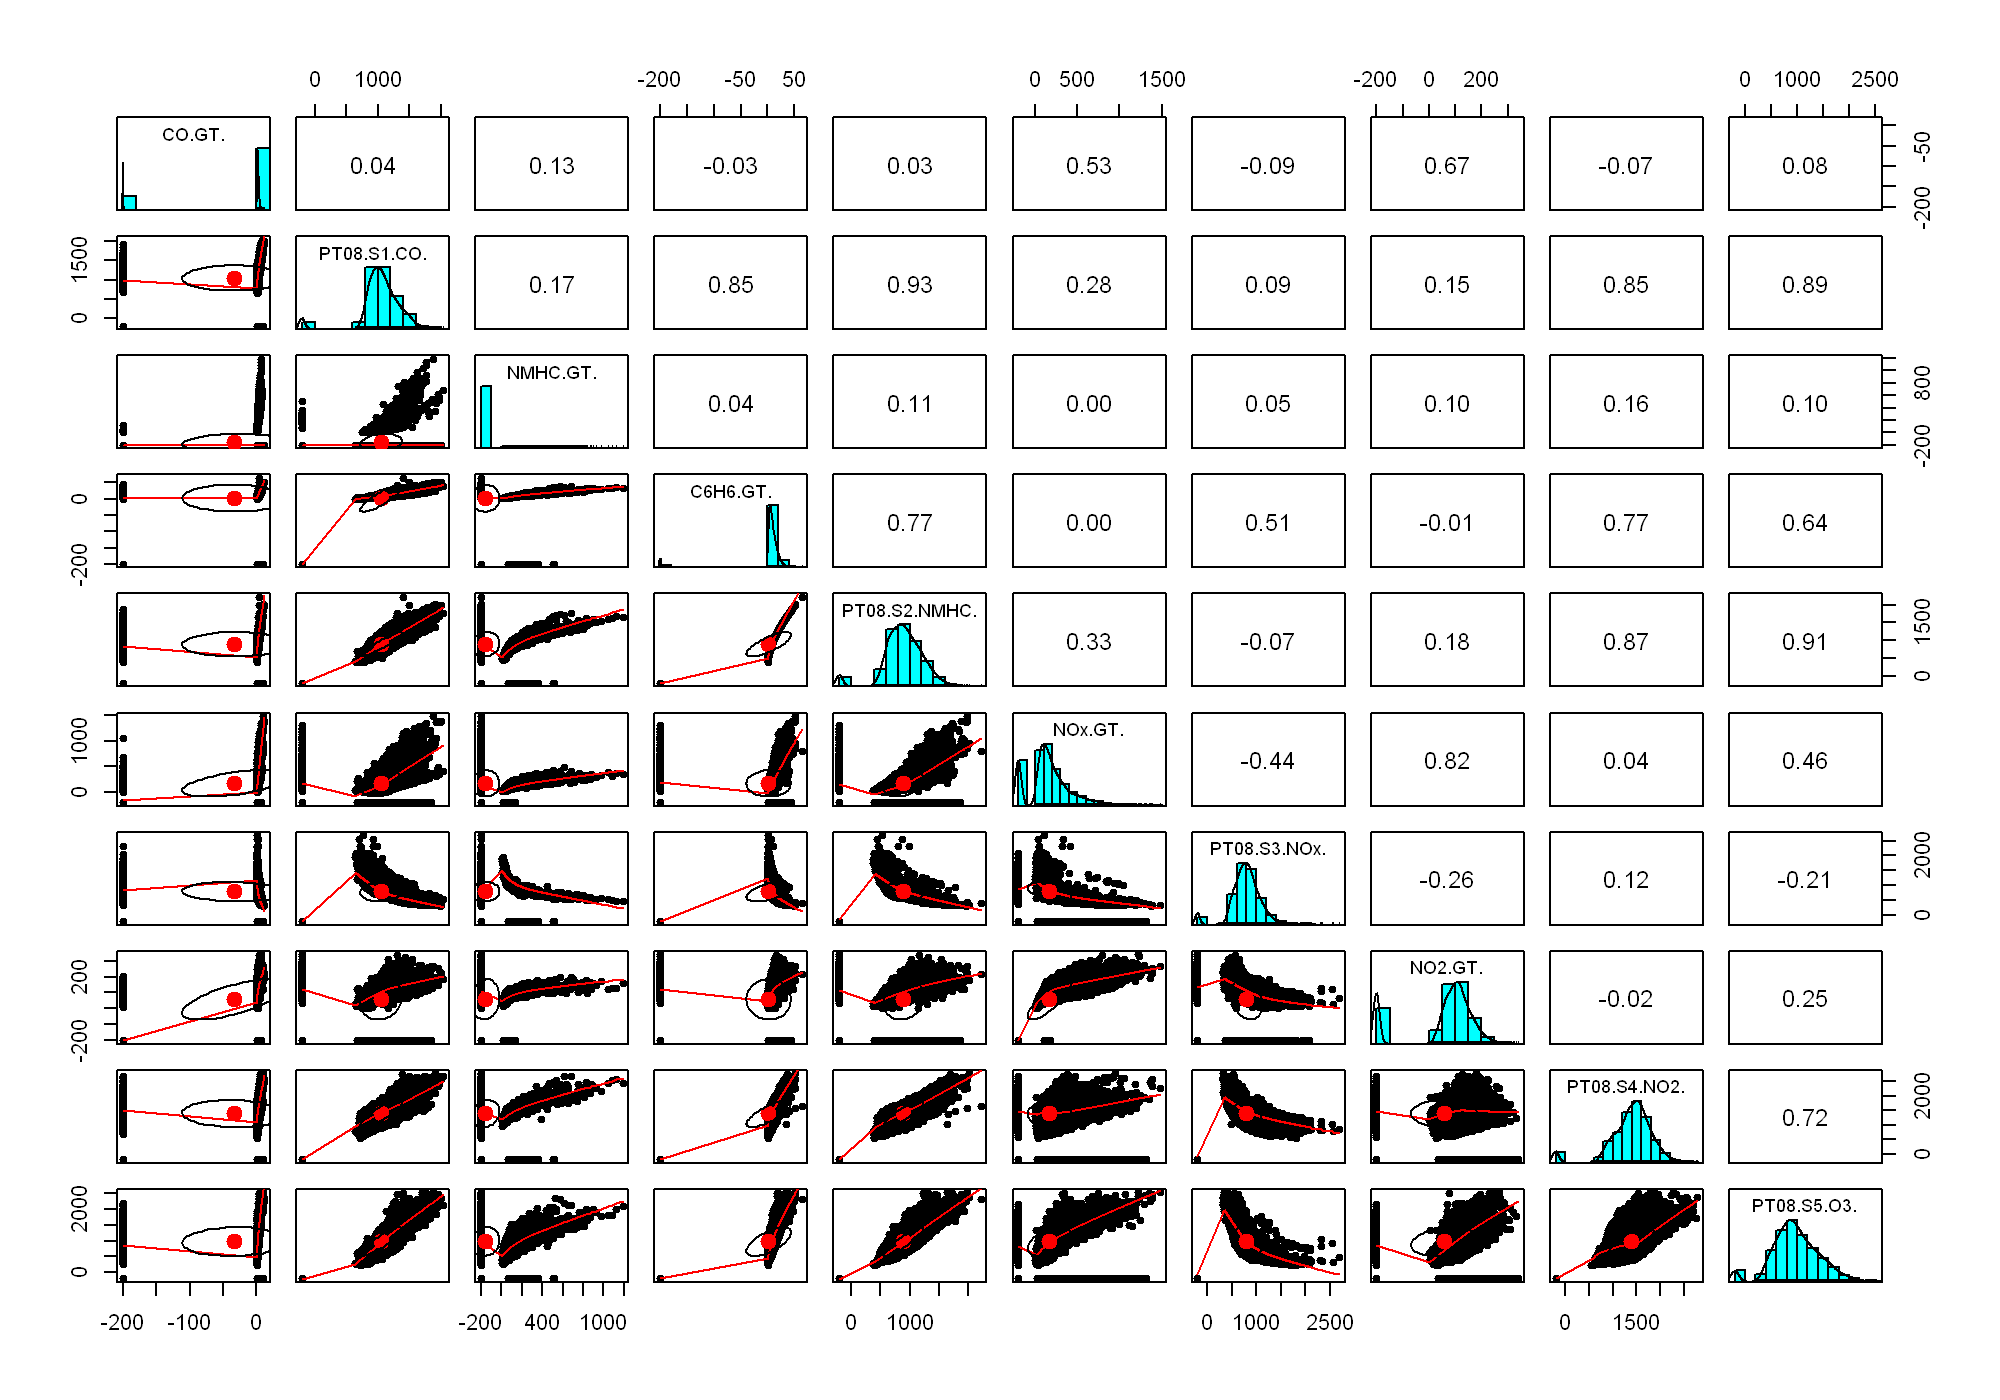

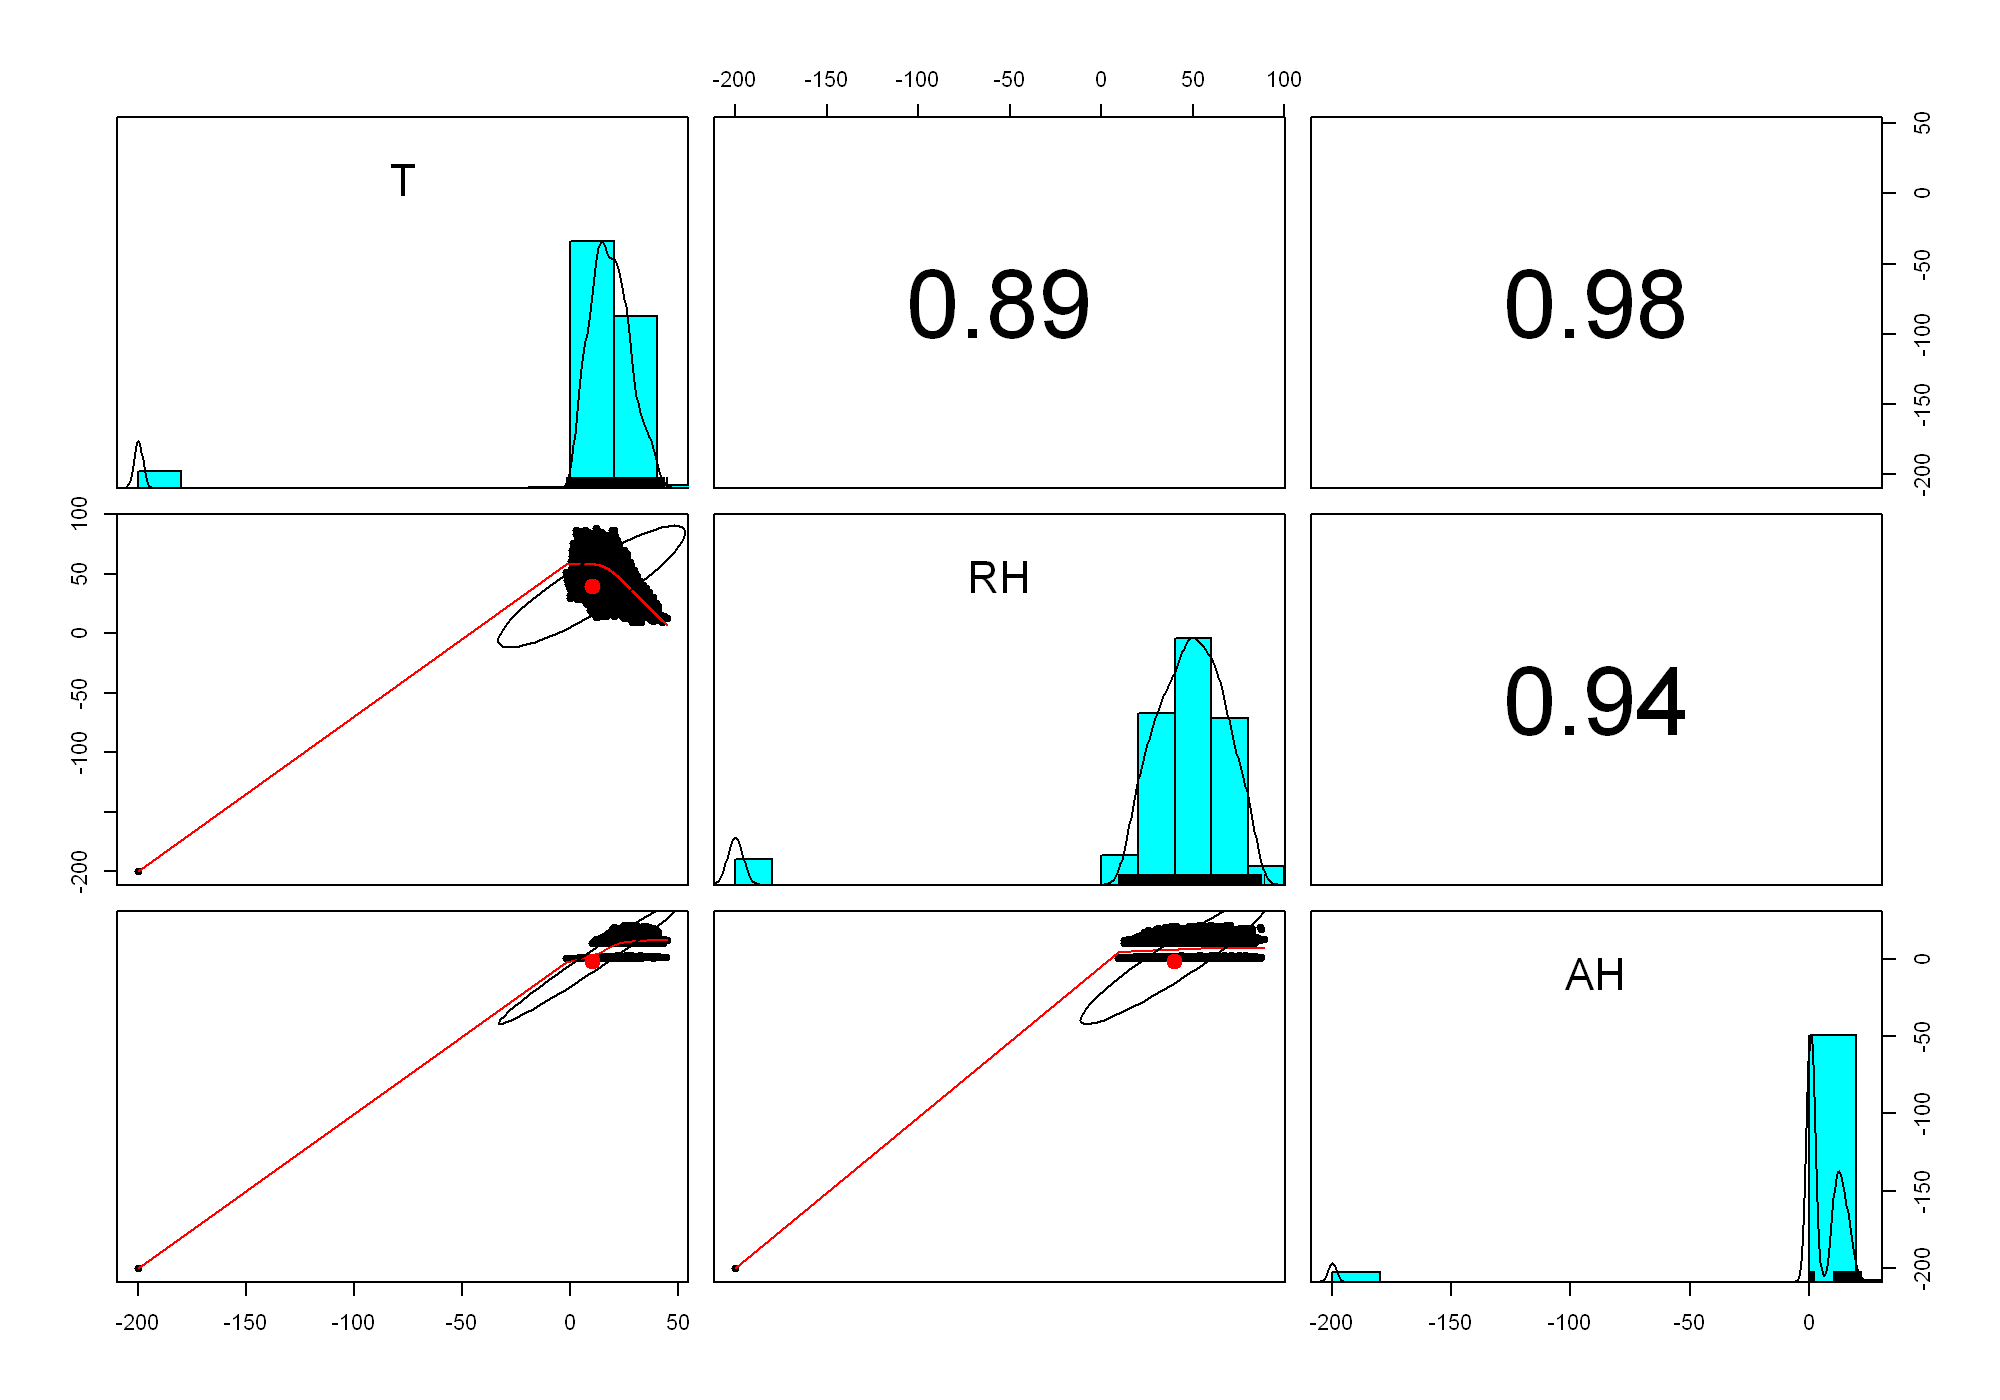

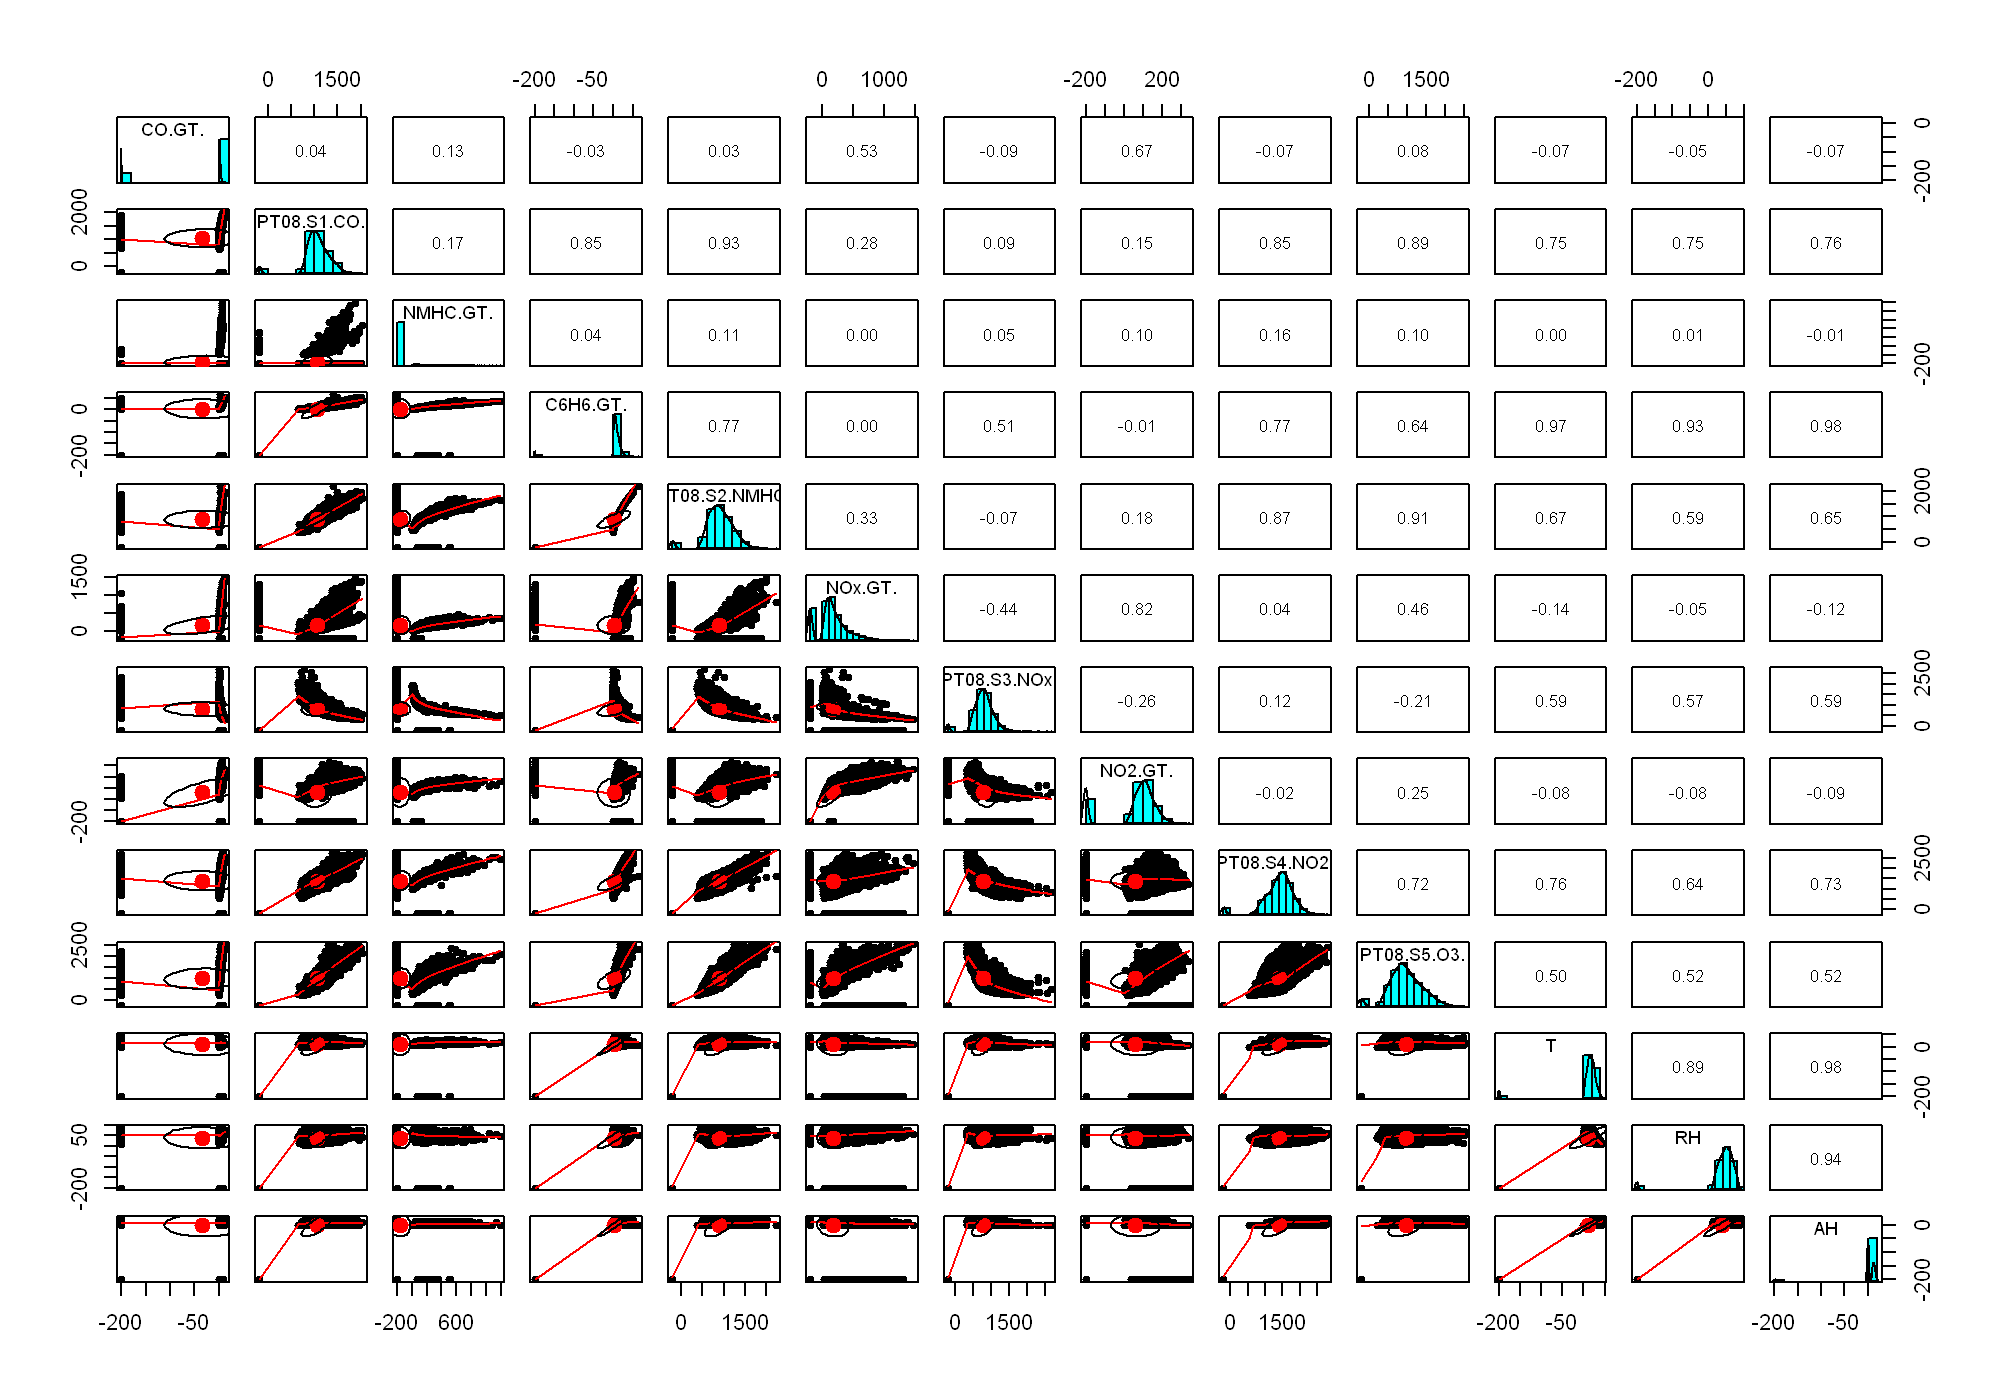

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)

pairs.panels(X)
pairs.panels(Y)
pairs.panels(datafinal)

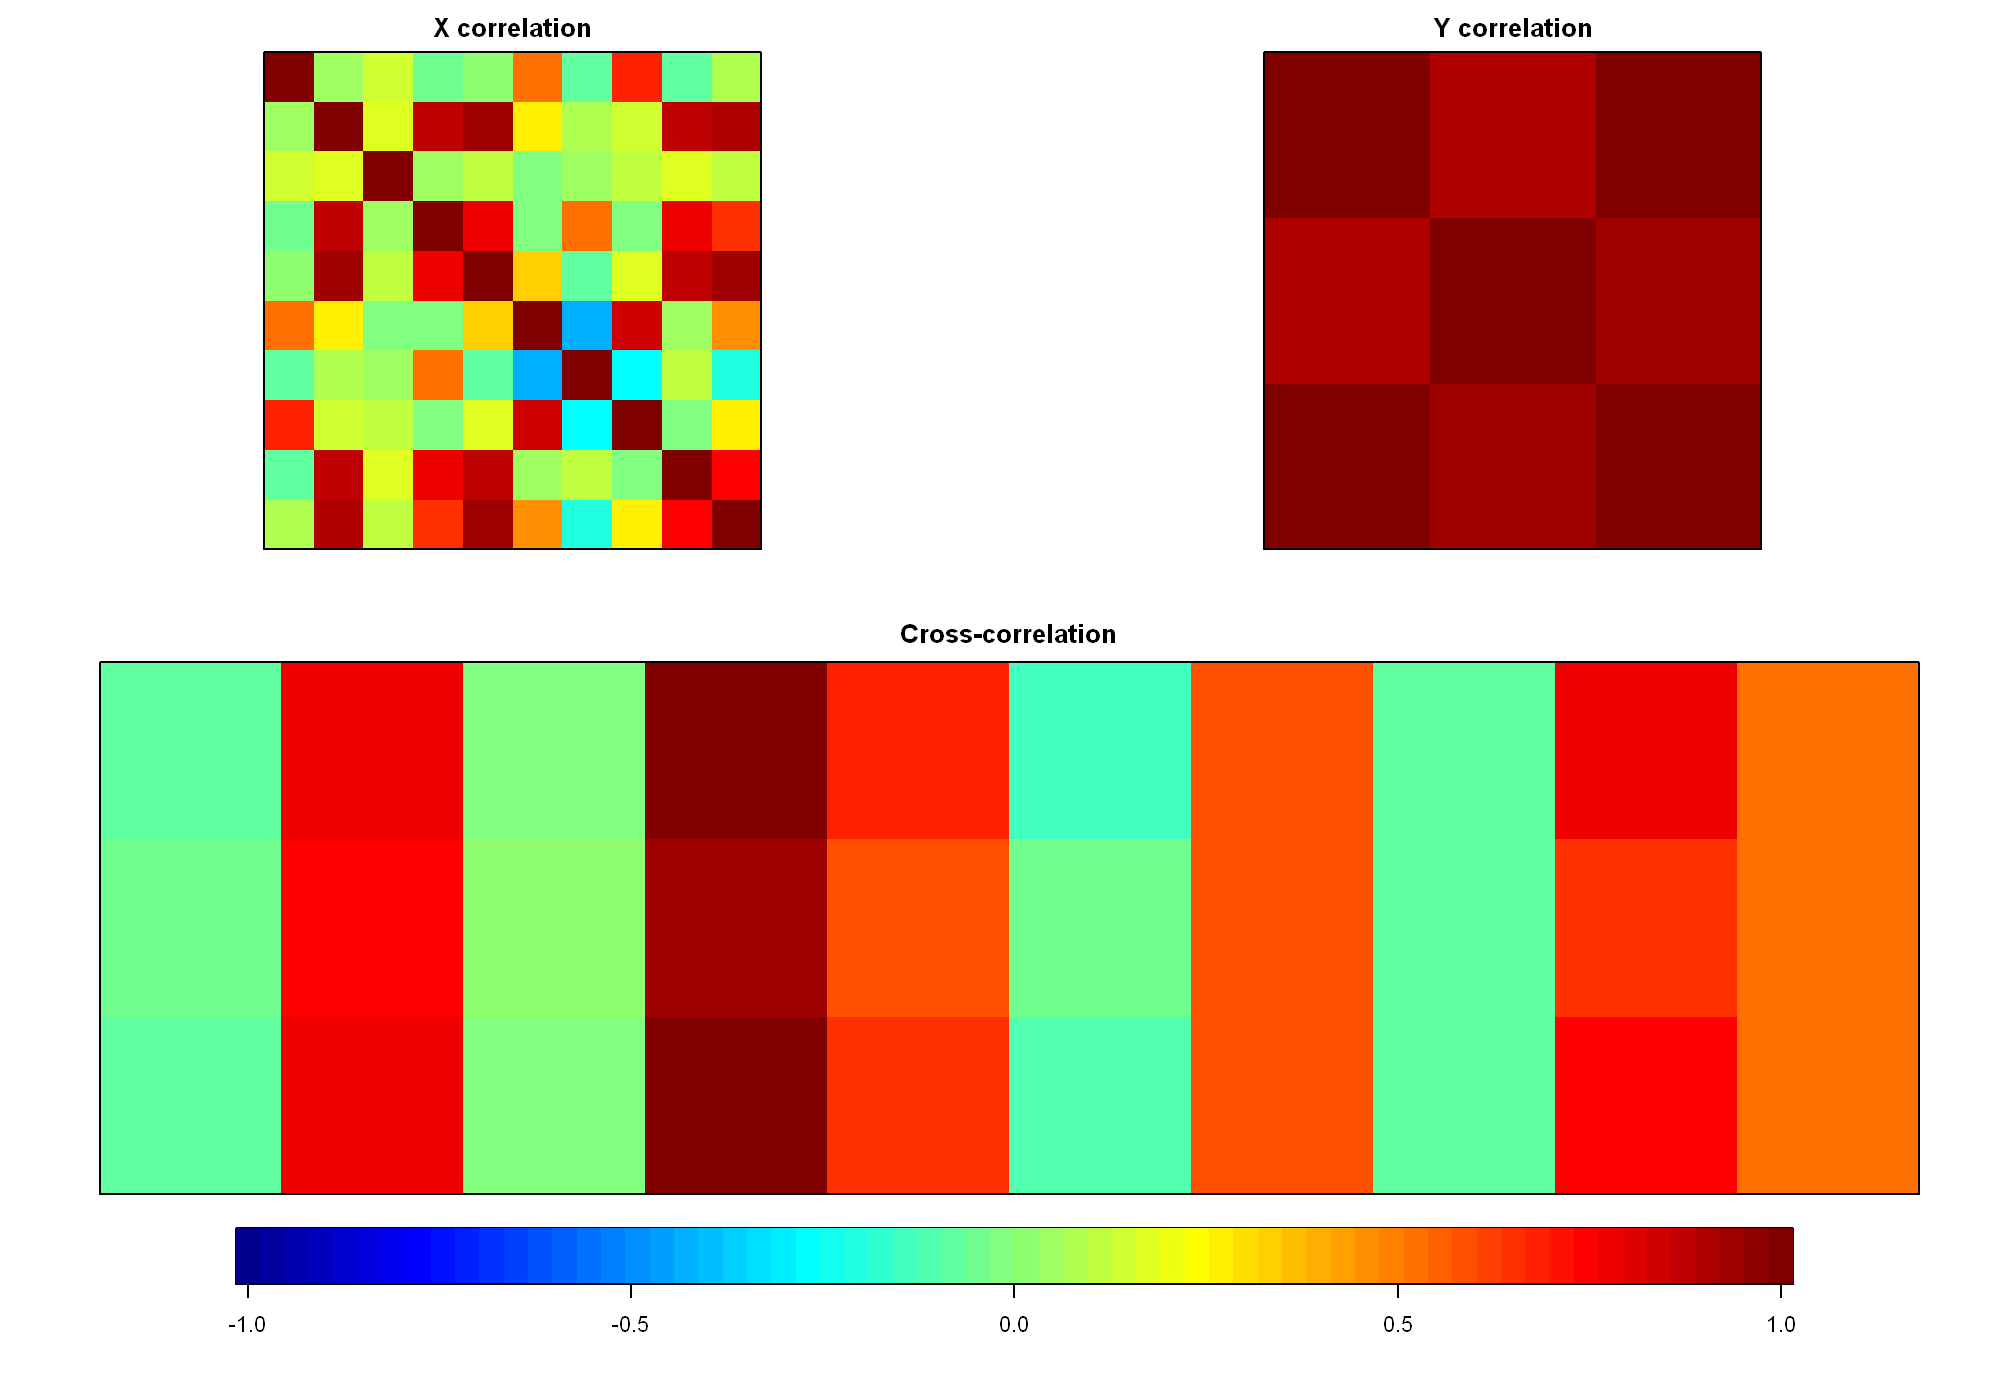

In [6]:
img.matcor(matcor(X, Y ), type = 2)

## D. Uji Asumsi Normalitas

In [7]:
mvn(X)
mvn(Y)

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 48.52523       0  NO

$univariateNormality
               Test      Variable Statistic   p value Normality
1  Anderson-Darling    CO.GT.     2501.1533  <0.001      NO    
2  Anderson-Darling  PT08.S1.CO.   355.4125  <0.001      NO    
3  Anderson-Darling   NMHC.GT.    2820.9492  <0.001      NO    
4  Anderson-Darling   C6H6.GT.    2272.5848  <0.001      NO    
5  Anderson-Darling PT08.S2.NMHC.  119.2082  <0.001      NO    
6  Anderson-Darling    NOx.GT.     188.7943  <0.001      NO    
7  Anderson-Darling PT08.S3.NOx.   159.0311  <0.001      NO    
8  Anderson-Darling    NO2.GT.     894.6616  <0.001      NO    
9  Anderson-Darling PT08.S4.NO2.   183.3416  <0.001      NO    
10 Anderson-Darling  PT08.S5.O3.    45.6823  <0.001      NO    

$Descriptives
                 n        Mean   Std.Dev Median  Min    Max   25th   75th
CO.GT.        9357  -34.207524  77.65717    1.5 -200   11.9    0.6    2.6
PT08.S1.CO.   9357 1048.990061 329.83271 1053.0 -200 2040.0  921.0 1221.0
NMHC.GT.      9357 -159.090093 139.78909 -200.0 -200 1189.0 -200.0 -200.0
C6H6.GT.      9357    1.865683  41.38021    7.9 -200   63.7    4.0   13.6
PT08.S2.NMHC. 9357  894.595276 342.33325  895.0 -200 2214.0  711.0 1105.0
NOx.GT.       9357  168.616971 257.43387  141.0 -200 1479.0   50.0  284.0
PT08.S3.NOx.  9357  794.990168 321.99355  794.0 -200 2683.0  637.0  960.0
NO2.GT.       9357   58.148873 126.94046   96.0 -200  340.0   53.0  133.0
PT08.S4.NO2.  9357 1391.479641 467.21012 1446.0 -200 2775.0 1185.0 1662.0
PT08.S5.O3.   9357  975.072032 456.93818  942.0 -200 2523.0  700.0 1255.0
                     Skew   Kurtosis
CO.GT.        -1.66564534  0.7764412
PT08.S1.CO.   -1.72095155  5.8312880
NMHC.GT.       4.07447779 18.8484336
C6H6.GT.      -4.50731741 19.1730172
PT08.S2.NMHC. -0.79318027  2.3670340
NOx.GT.        0.82496763  1.5030090
PT08.S3.NOx.  -0.38463642  3.1012216
NO2.GT.       -1.22523671  0.2741107
PT08.S4.NO2.  -1.24371109  3.2633022
PT08.S5.O3.   -0.03465077  0.6365370

$multivariateNormality
           Test      HZ p value MVN
1 Henze-Zirkler 466.857       0  NO

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling     T      2041.459  <0.001      NO    
2 Anderson-Darling    RH      1329.045  <0.001      NO    
3 Anderson-Darling    AH      2383.691  <0.001      NO    

$Descriptives
      n      Mean  Std.Dev  Median  Min    Max    25th   75th      Skew
T  9357  9.778305 43.20362 17.2000 -200 44.600 10.9000 24.100 -4.444042
RH 9357 39.485380 51.21614 48.6000 -200 88.700 34.1000 61.900 -3.931147
AH 9357 -1.673907 40.53292  0.9768 -200 21.806  0.6923 12.461 -4.557481
   Kurtosis
T  18.75948
RH 15.75108
AH 19.42985

## E. Korelasi Kanonik

### Dengan Menggunakan Library

In [8]:
cancor(X, Y) #default function from stats library
can.air = cc(X, Y)


Canonical correlation analysis of:
	 10   X  variables:  CO.GT., PT08.S1.CO., NMHC.GT., C6H6.GT., PT08.S2.NMHC., NOx.GT., PT08.S3.NOx., NO2.GT., PT08.S4.NO2., PT08.S5.O3. 
  with	 3   Y  variables:  T, RH, AH 

    CanR  CanRSQ    Eigen  percent    cum                          scree
1 0.9975 0.99506 201.2308 99.60889  99.61 ******************************
2 0.6521 0.42520   0.7397  0.36616  99.98                               
3 0.2190 0.04798   0.0504  0.02495 100.00                               

Test of H0: The canonical correlations in the 
current row and all that follow are zero

     CanR LR test stat approx F numDF denDF   Pr(> F)    
1 0.99752      0.00271   5938.3    30 27427 < 2.2e-16 ***
2 0.65207      0.54722    365.3    18 18690 < 2.2e-16 ***
3 0.21904      0.95202     58.9     8  9346 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

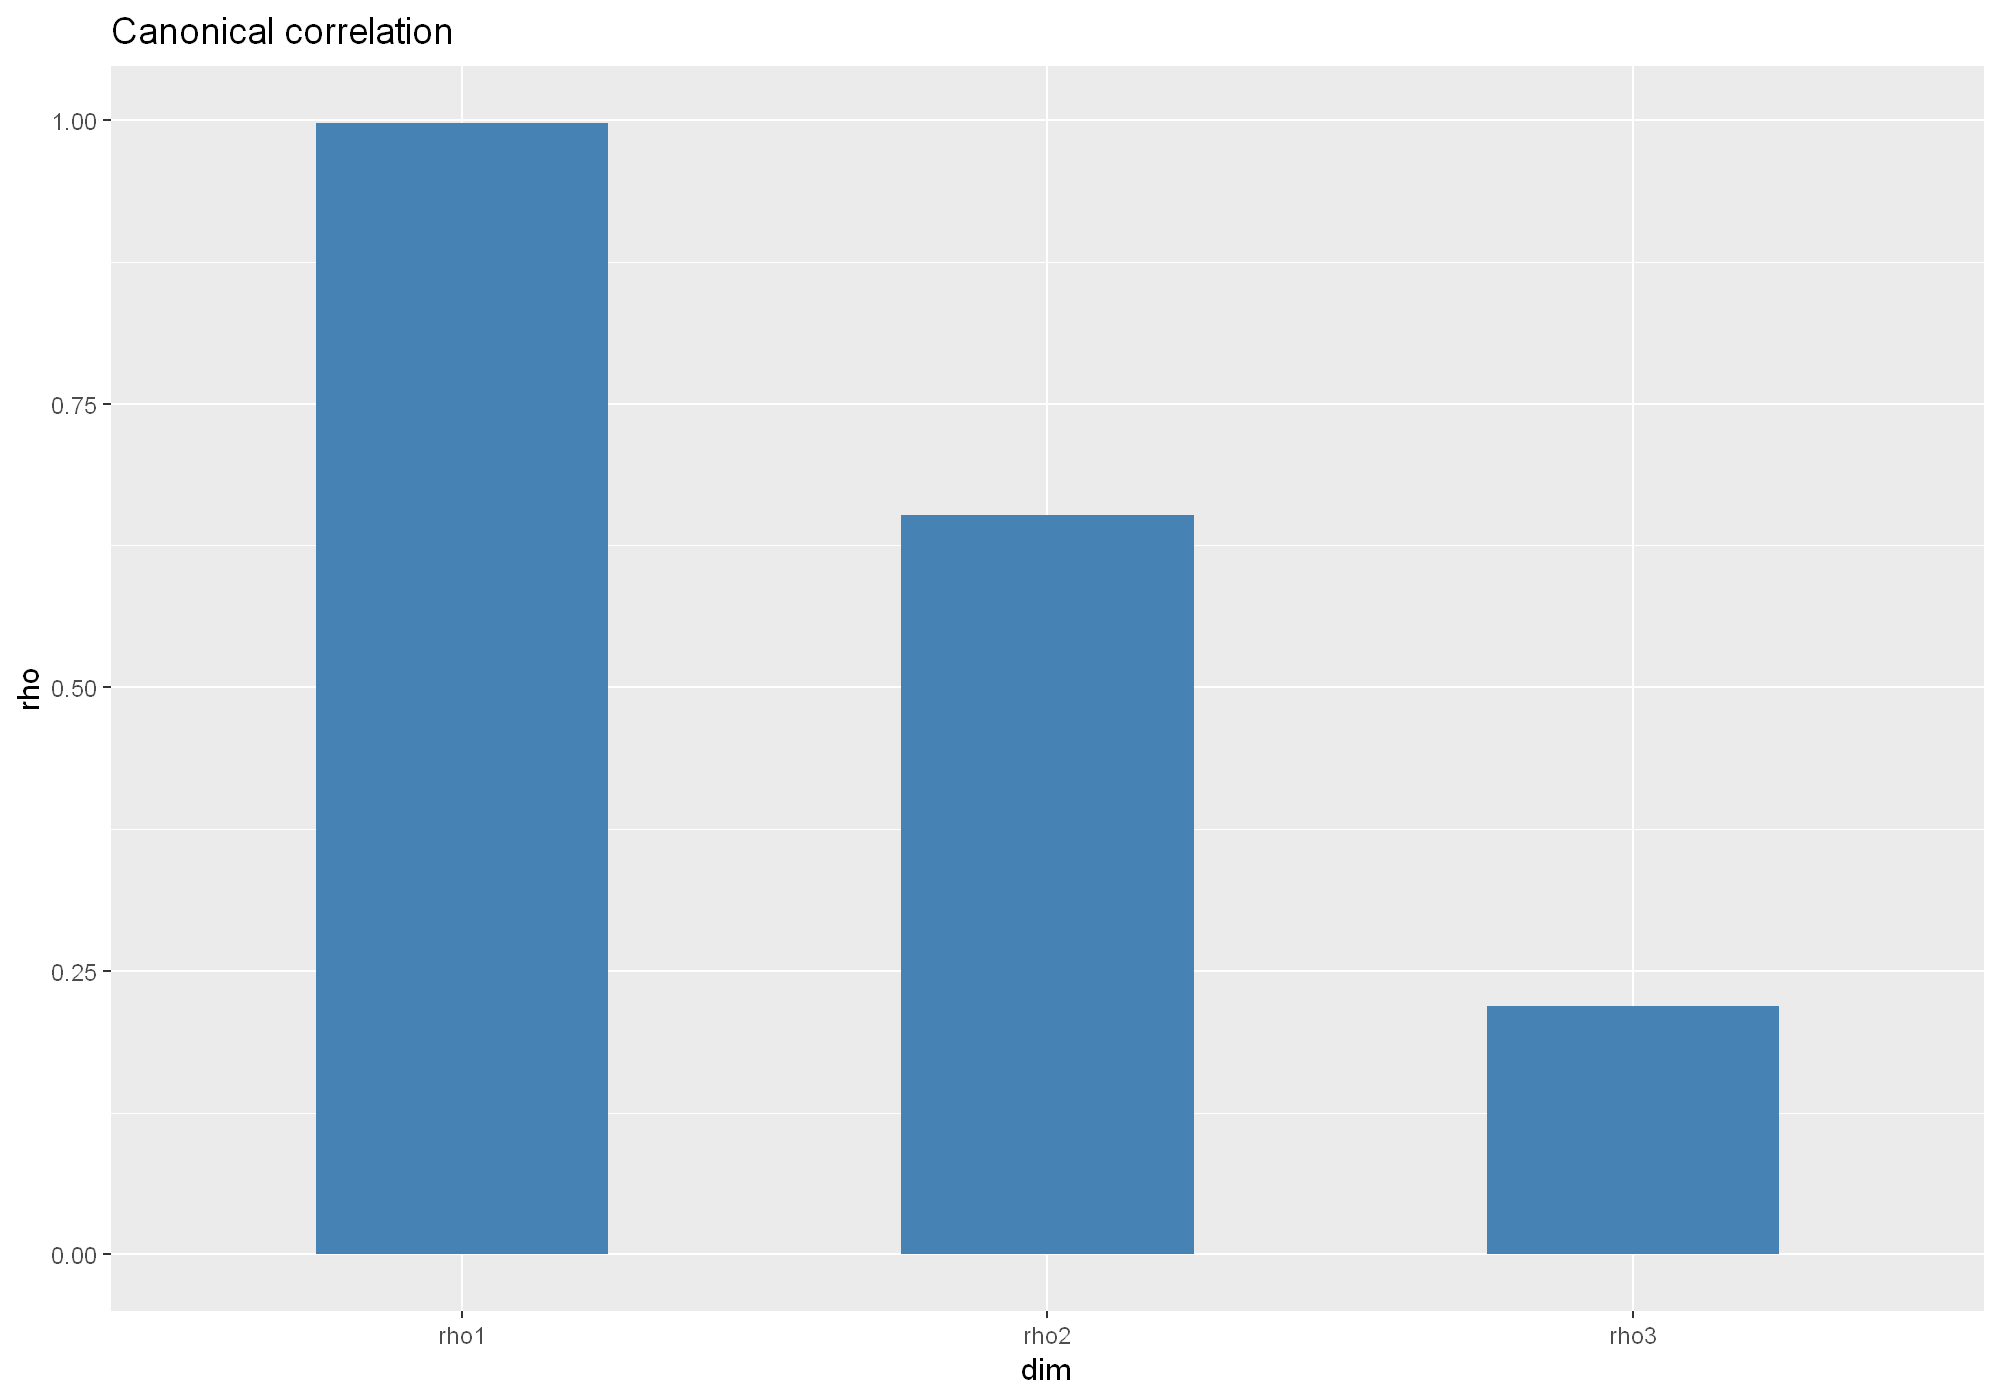

In [9]:
can.coef = data.frame(rho = can.air$cor, dim = c("rho1", "rho2", "rho3"))
ggplot(can.coef, aes(x = dim, y = rho)) + geom_bar(stat = "identity", width = 0.5, fill = "steel blue") + 
  labs(title = "Canonical correlation")

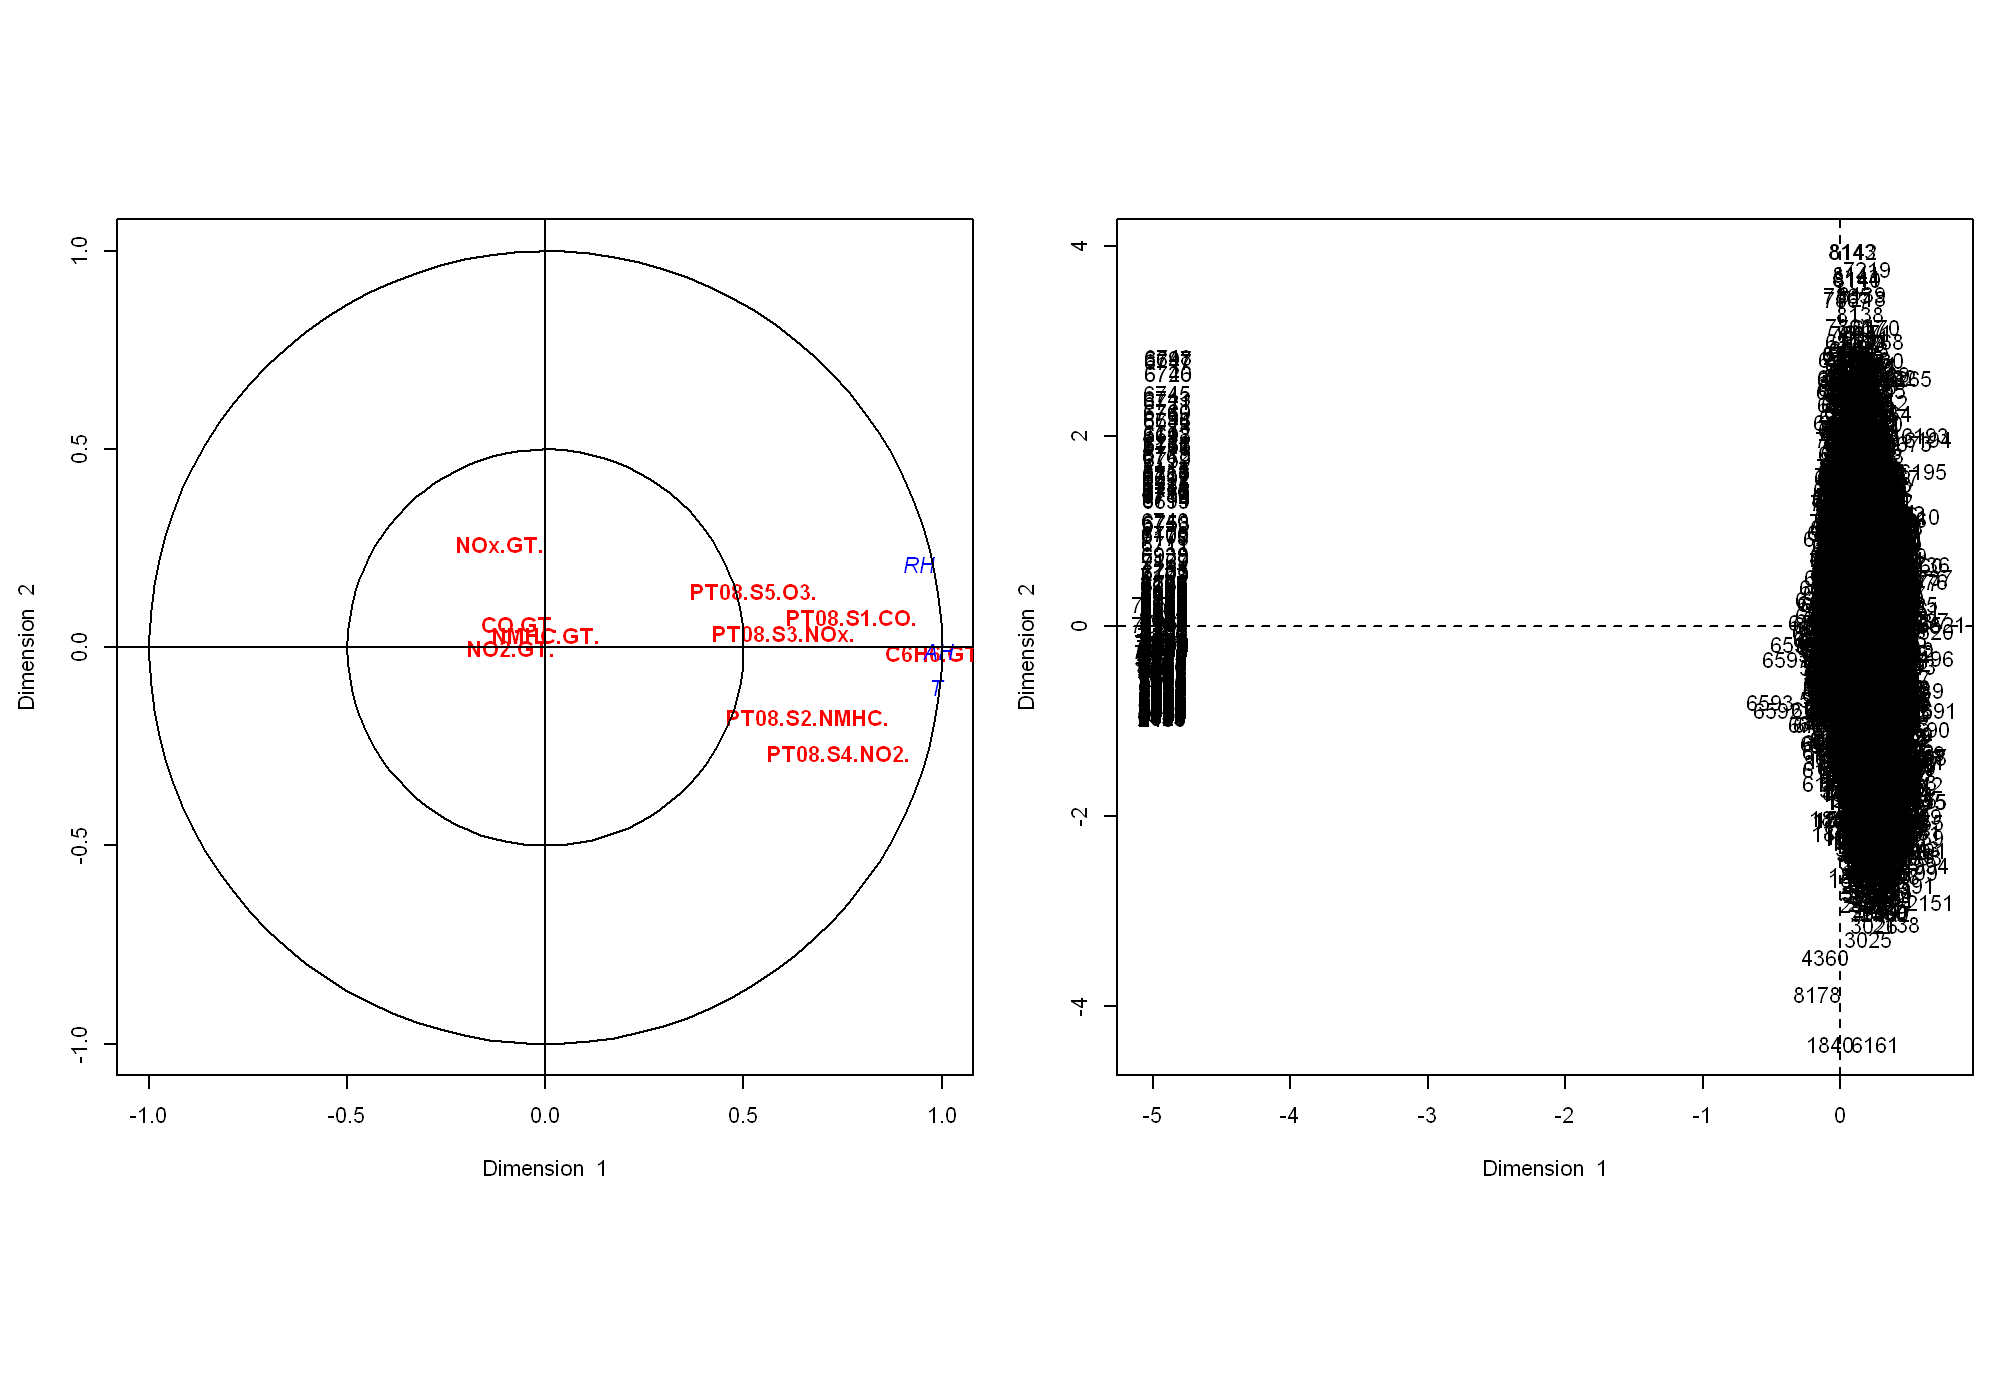

In [10]:
plt.cc(can.air, var.label = TRUE)

### Dengan Manual

In [11]:
rxx = cor(X)
ryy = cor(Y)
rxy = cor(X, Y)
ryx = cor(Y, X)

In [12]:
#Following formula from Rencher (2012), we are going to compute multiplication of inverse and the partition 
#matrix above. That is : Rxx^-1 * Rxy * Ryy^-1 * Ryx
rho.mat = solve(rxx)%*%rxy%*%solve(ryy)%*%ryx

In [13]:
#Eigen values of the resulting matrix is the squared canonical correlations that we are interested in
sq.rho = eigen(rho.mat)$values #squared canonical correlations

In [14]:
#canonical correlations
sqrt(sq.rho)

[1] 9.975245e-01+0.000000e+00i 6.520720e-01+0.000000e+00i
 [3] 2.190423e-01+0.000000e+00i 0.000000e+00+2.221150e-08i
 [5] 1.571093e-08+0.000000e+00i 1.429838e-08+5.771234e-09i
 [7] 1.429838e-08-5.771234e-09i 0.000000e+00+1.049256e-08i
 [9] 3.512485e-10+4.837271e-09i 3.512485e-10-4.837271e-09i

## F. Uji Hipotesis Independensi

### Dengan Menggunakan Library

In [15]:
ccan <- candisc::cancor(X,Y)
summary(ccan)


Canonical correlation analysis of:
	 10   X  variables:  CO.GT., PT08.S1.CO., NMHC.GT., C6H6.GT., PT08.S2.NMHC., NOx.GT., PT08.S3.NOx., NO2.GT., PT08.S4.NO2., PT08.S5.O3. 
  with	 3   Y  variables:  T, RH, AH 

    CanR  CanRSQ    Eigen  percent    cum                          scree
1 0.9975 0.99506 201.2308 99.60889  99.61 ******************************
2 0.6521 0.42520   0.7397  0.36616  99.98                               
3 0.2190 0.04798   0.0504  0.02495 100.00                               

Test of H0: The canonical correlations in the 
current row and all that follow are zero

     CanR LR test stat approx F numDF denDF   Pr(> F)    
1 0.99752      0.00271   5938.3    30 27427 < 2.2e-16 ***
2 0.65207      0.54722    365.3    18 18690 < 2.2e-16 ***
3 0.21904      0.95202     58.9     8  9346 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Raw canonical coefficients

   X  variables: 
                    Xcan1       Xcan2      Xcan3
CO.GT.     

In [16]:
p.asym(can.air$cor, dim(X)[1], length(X), length(Y), tstat = "Hotelling")
p.asym(can.air$cor, dim(X)[1], length(X), length(Y),tstat = "Pillai")
p.asym(can.air$cor, dim(X)[1], length(X), length(Y),tstat = "Roy")
p.asym(can.air$cor, dim(X)[1], length(X), length(Y),tstat = "Wilks")

 Hotelling-Lawley Trace, using F-approximation:
                 stat      approx df1   df2 p.value
1 to 3:  202.02095295 62913.81410  30 28028       0
2 to 3:    0.79012667   410.19280  18 28034       0
3 to 3:    0.05039757    58.88116   8 28040       0
 Pillai-Bartlett Trace, using F-approximation:
               stat    approx df1   df2 p.value
1 to 3:  1.46823254 895.83449  30 28038       0
2 to 3:  0.47317738 291.75390  18 28044       0
3 to 3:  0.04797952  56.98747   8 28050       0
 Roy's Largest Root, using F-approximation:
              stat   approx df1  df2 p.value
1 to 1:  0.9950552 627370.6   3 9353       0

 F statistic for Roy's Greatest Root is an upper bound.
Wilks' Lambda, using F-approximation (Rao's F):
                stat     approx df1      df2 p.value
1 to 3:  0.002705935 5938.27690  30 27427.16       0
2 to 3:  0.547223405  365.30256  18 18690.00       0
3 to 3:  0.952020483   58.87696   8  9346.00       0


### Dengan Manual

In [25]:
#Approach with f distribution
#Testing overall significance can also be made based only upon correlation matrix
wilk.gl = det(cor(datafinal))/(det(cor(X))*det(cor(Y)))

wf = dim(datafinal)[1]-(dim(X)[2]+dim(Y)[2]+3)/2
tf = sqrt((dim(X)[2]^2*dim(Y)[2]^2-4)/(dim(X)[2]^2+dim(Y)[2]^2-5))
df1 = dim(X)[2]*dim(Y)[2]
df2 = wf*tf-df1/2+1 
ap.f = (1-wilk.gl^(1/tf))*df2/(wilk.gl^(1/tf)*df1)

wilk.gl
pf(ap.f, df1, df2, lower.tail = FALSE) #pvalue for f distribution approach

[1] 0.002705935

[1] 0

In [24]:
wilk.gl = prod(1-sq.rho)
pillai.gl = sum(sq.rho)
hotel.gl = sum(sq.rho/(1-sq.rho))

hotel.gl
pillai.gl
wilk.gl

[1] 202.021+0i

[1] 1.468233+0i

[1] 0.002705935+0i

In [20]:
#For roy test, it is basically only testing significance with 1st dimension.
#Extension for testing succeeding dimensions can be made by modifying the formula based on eigen values
wilk.gl2 = prod(1-sq.rho[-1]) #testing dimension 2 to 3
wilk.gl2

[1] 0.5472234+0i

## G. Koefisien Fungsi Kanonik/Canonical Variates

In [26]:
coef(ccan, type="both", standardize=FALSE)

,Xcan1,Xcan2,Xcan3
CO.GT.,5.011969e-05,2.621620e-04,0.001141472
PT08.S1.CO.,-6.654716e-05,3.620302e-03,-0.006806494
NMHC.GT.,-1.430055e-04,8.087694e-04,-0.001996911
C6H6.GT.,3.013952e-02,1.387751e-02,0.068816630
PT08.S2.NMHC.,-1.351607e-03,-8.396481e-03,-0.005282703
NOx.GT.,4.702417e-05,3.870728e-03,0.001867508
PT08.S3.NOx.,-3.105477e-04,-4.094131e-04,-0.004509376
NO2.GT.,-1.090667e-04,-6.348762e-03,-0.003673944
PT08.S4.NO2.,4.813099e-04,-1.306711e-05,0.002057076
PT08.S5.O3.,-4.134270e-05,2.257718e-03,0.001286801


In [21]:
# standardized coefficients
coef(ccan, type="both", standardize=TRUE)

,Xcan1,Xcan2,Xcan3
CO.GT.,0.003892153,0.020358762,0.0886435
PT08.S1.CO.,-0.021949429,1.194094146,-2.2450043
NMHC.GT.,-0.019990610,0.113057139,-0.2791463
C6H6.GT.,1.247179386,0.574254200,2.8476464
PT08.S2.NMHC.,-0.462699981,-2.874394498,-1.8084448
NOx.GT.,0.012105614,0.996456359,0.4807598
PT08.S3.NOx.,-0.099994343,-0.131828387,-1.4519900
NO2.GT.,-0.013844973,-0.805914764,-0.4663722
PT08.S4.NO2.,0.224872856,-0.006105085,0.9610867
PT08.S5.O3.,-0.018891060,1.031637387,0.5879885
